In [7]:
import sys
import os

# Go one level up (from notebooks to project root)
sys.path.insert(0, os.path.abspath(".."))

from src.data_preprocessing.preprocess import load_and_clean_data
from src.feature_engineering.features import select_features
from src.modeling.train import train_model

In [19]:
import os
print(os.getcwd())

C:\Users\Admin\OneDrive\Desktop\FactoryGuard-AI\notebooks


In [20]:
import os
print(os.path.exists("../data/raw/ai4i_predictive_maintenance.csv"))

True


In [26]:
df = pd.read_csv("../data/raw/ai4i_predictive_maintenance.csv")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [27]:
X = df.drop("Machine failure", axis=1)
y = df["Machine failure"]

In [30]:
import pandas as pd

df = pd.read_csv("../data/raw/ai4i_predictive_maintenance.csv")
df = df.drop(["UDI", "Product ID"], axis=1)
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,True,False
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,True,False
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,True,False


In [31]:
X = df.drop("Machine failure", axis=1)
y = df["Machine failure"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [36]:
import os
print(os.getcwd())

C:\Users\Admin\OneDrive\Desktop\FactoryGuard-AI\notebooks


In [37]:
import os
import pickle

# Create models folder if it doesn't exist
os.makedirs("../models", exist_ok=True)

# Save model
with open("../models/baseline_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!


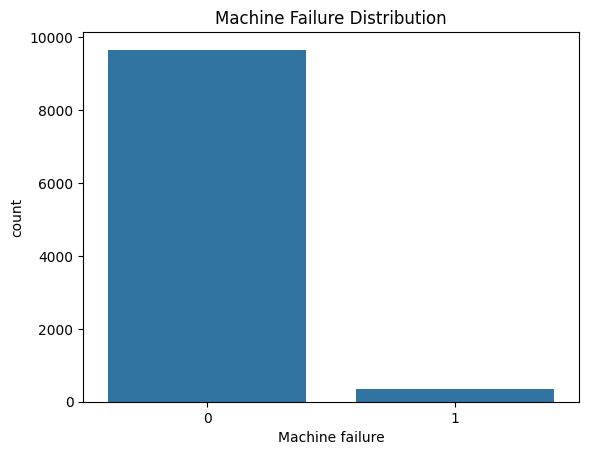

Machine failure
0    9661
1     339
Name: count, dtype: int64


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Machine Failure Distribution")
plt.show()

print(y.value_counts())

In [39]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Accuracy: 0.999


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid,
                    cv=3)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Tuned Accuracy: 0.999


In [41]:
import pickle

with open("../models/final_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Final model saved!")

Final model saved!


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)
print(cm)

[[1939    0]
 [   2   59]]


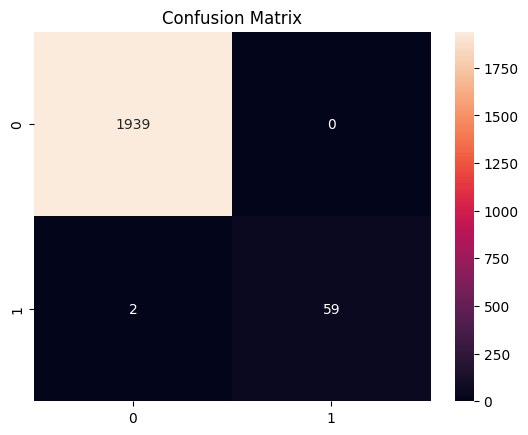

In [43]:
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()